# Reducción de dimensionalidad. PCA: Principal Component Analysis
#### UD3. Aprendizaxe non supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

# Solución Ejercicios

**1. ¿Cuáles son las principales motivaciones para reducir la dimensionalidad de un Dataset? ¿Cuáles son los principales inconvenientes?**

La `reducción de dimensionalidad` es importante para evitar la maldición de la dimensionalidad. Cuando se siguen añadiendo características sin aumentar en número de muestras de entrenamiento, la dimensionalidad del espacio de características crece y se vuelve más y mñas dispersa. Debido a esta escasez, resulta mucho más difícil encontrar una solución perfecta para el modelo de ML, lo que muy probable conduce a un sobreajuste. El `sobreajuste` ocurre cuando el modelo se corresponde demasiado con un conjunto particular de datos y no se generaliza bien. Un modelo sobredimensionado funcionaría demasiado bien en el conjunto de datos de formación para que falle en datos futuros y haga que la predicción sea poco fiable.

Enumeramos las siguientes motivaciones:
- Podemos visualizar los datos en espacios 2D/3D.
- Queremos reducir la dimensionalidad de grandes conjuntos de datos que sospechamos que tienen características estáticas o, por contra, alteradas (corruptas o con errores). En este caso, la reducción será un paso de preprocesamiento para luego entrenar el conjunto de datos reducido para la tarea final, lo que significa un entrenamiento más rápido.
- Compresión de datos.

Inconvenientes: al reducir la dimensionalidad del conjunto de datos..
- Por lo general, perdemos información útil en el proceso, aunque tratamos de conservar la mayor cantidad posible.
- El modelo entrenado resultante normalmente será más débil que un modelo entrenado en el conjunto de datos original.
- Puede ser computacionalmente costoso (dependiendo del algoritmo, las características y el tamaño del conjunto de datos).
- Agrega complejidad a la canalización general de aprendizaje automático.
- Las funciones transformadas suelen ser difíciles de interpretar.

**2. Carga el dataset de MNIST de reconocimiento de dígitos y divídelo en los conjuntos train/test**

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
X, y = datasets.fetch_openml(name='mnist_784', return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000)
X_train.shape

(60000, 784)

**Entrena a un clasificador de random forest en el dataset y cronometra cuánto tiempo le lleva**

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
forest = RandomForestClassifier(n_estimators=100)

In [6]:
%timeit -n1 -r1 forest.fit(X_train, y_train)
#En mi caso el clasificador Random Forest tardó 46 segundos en entrenar los datos originales con 784 features y obtuvo un score del 97 %

32.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


**Evalúa el modelo resultante en el conjunto de prueba**

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
accuracy_score(y_test, forest.predict(X_test))

0.9693

**Usa PCA para reducir la dimensionalidad del conjunto de datos con una relación de varianza explicada del 95%**

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=0.95)

In [11]:
pca.fit(X_train)

PCA(n_components=0.95)

In [13]:
X_train_ = pca.transform(X_train)
X_test_ = pca.transform(X_test)
X_train_.shape

(60000, 154)

In [14]:
import numpy as np
cumsum = np.cumsum(pca.explained_variance_ratio_)
sum = np.sum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= .95) + 1
print('num de argumentos para que el ratio de varianza sea superior al 95%) ',d) #Con 154 features ya preservamos el 95% de los datos
print(' sumatorio total: ',sum)
print(' array de varianzas para cada PCA:',cumsum)

num de argumentos para que el ratio de varianza sea superior al 95%)  154
 sumatorio total:  0.9503825939734594
 array de varianzas para cada PCA: [0.09798515 0.16938432 0.23101507 0.28501521 0.33386564 0.37677185
 0.40948888 0.43846836 0.46598462 0.48945052 0.51046722 0.53084527
 0.54797556 0.5648882  0.58074906 0.59560296 0.60878355 0.62150874
 0.63340407 0.64493179 0.65561199 0.665707   0.67530394 0.68438127
 0.69321607 0.70160133 0.70965272 0.71747496 0.72488027 0.73179575
 0.7383276  0.74475294 0.75075576 0.75661699 0.76229523 0.76771211
 0.77274329 0.7776175  0.78241639 0.78708774 0.79163377 0.79606825
 0.80023563 0.80419707 0.8080347  0.8118049  0.81541293 0.81890263
 0.82228159 0.825485   0.82865873 0.83175357 0.83473082 0.83760107
 0.8404259  0.84311953 0.84579567 0.84836384 0.85089041 0.85333758
 0.85573325 0.8581251  0.86041164 0.86262283 0.86474496 0.86680914
 0.86883425 0.87078139 0.87268987 0.87457442 0.87644408 0.87823628
 0.88000346 0.88174026 0.88338976 0.88501621 0.88

**Entrena un random forest classifier en el dataset reducido y mira cuánto tiempo tarda. ¿Fue el entrenamiento mucho más rápido?**

In [57]:
forest = RandomForestClassifier(n_estimators=100)

In [58]:
%timeit -n1 -r1 forest.fit(X_train_, y_train)


1min 48s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Respuesta:

**A continuación, evalúa el clasificador en el conjunto de prueba. ¿Cómo se compara con el clasificador anterior?**

In [43]:
accuracy_score(y_test, forest.predict(X_test_))
# Con PCA el training tardó más del doble del tiempo que con el conjunto de datos original y también hay una caída en el rendimiento. Así que PCA no ayudó en este supuesto. Este supuesto demuestra como no siempre PCA funciona. Si cambiamos de clasificador, quizás sí.

0.9493

**3. Carga el dataset de wine y aplica el algoritmo PCA para reducir su dimensionalidad**

In [62]:
# https://archive.ics.uci.edu/ml/datasets/wine
import pandas as pd
import numpy as np
df = pd.read_csv('data/wine.data.csv')

In [63]:
# 3.1. Comprueba los posibles valores nulos o nan
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
 13  Class

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Class                           0
dtype: int64

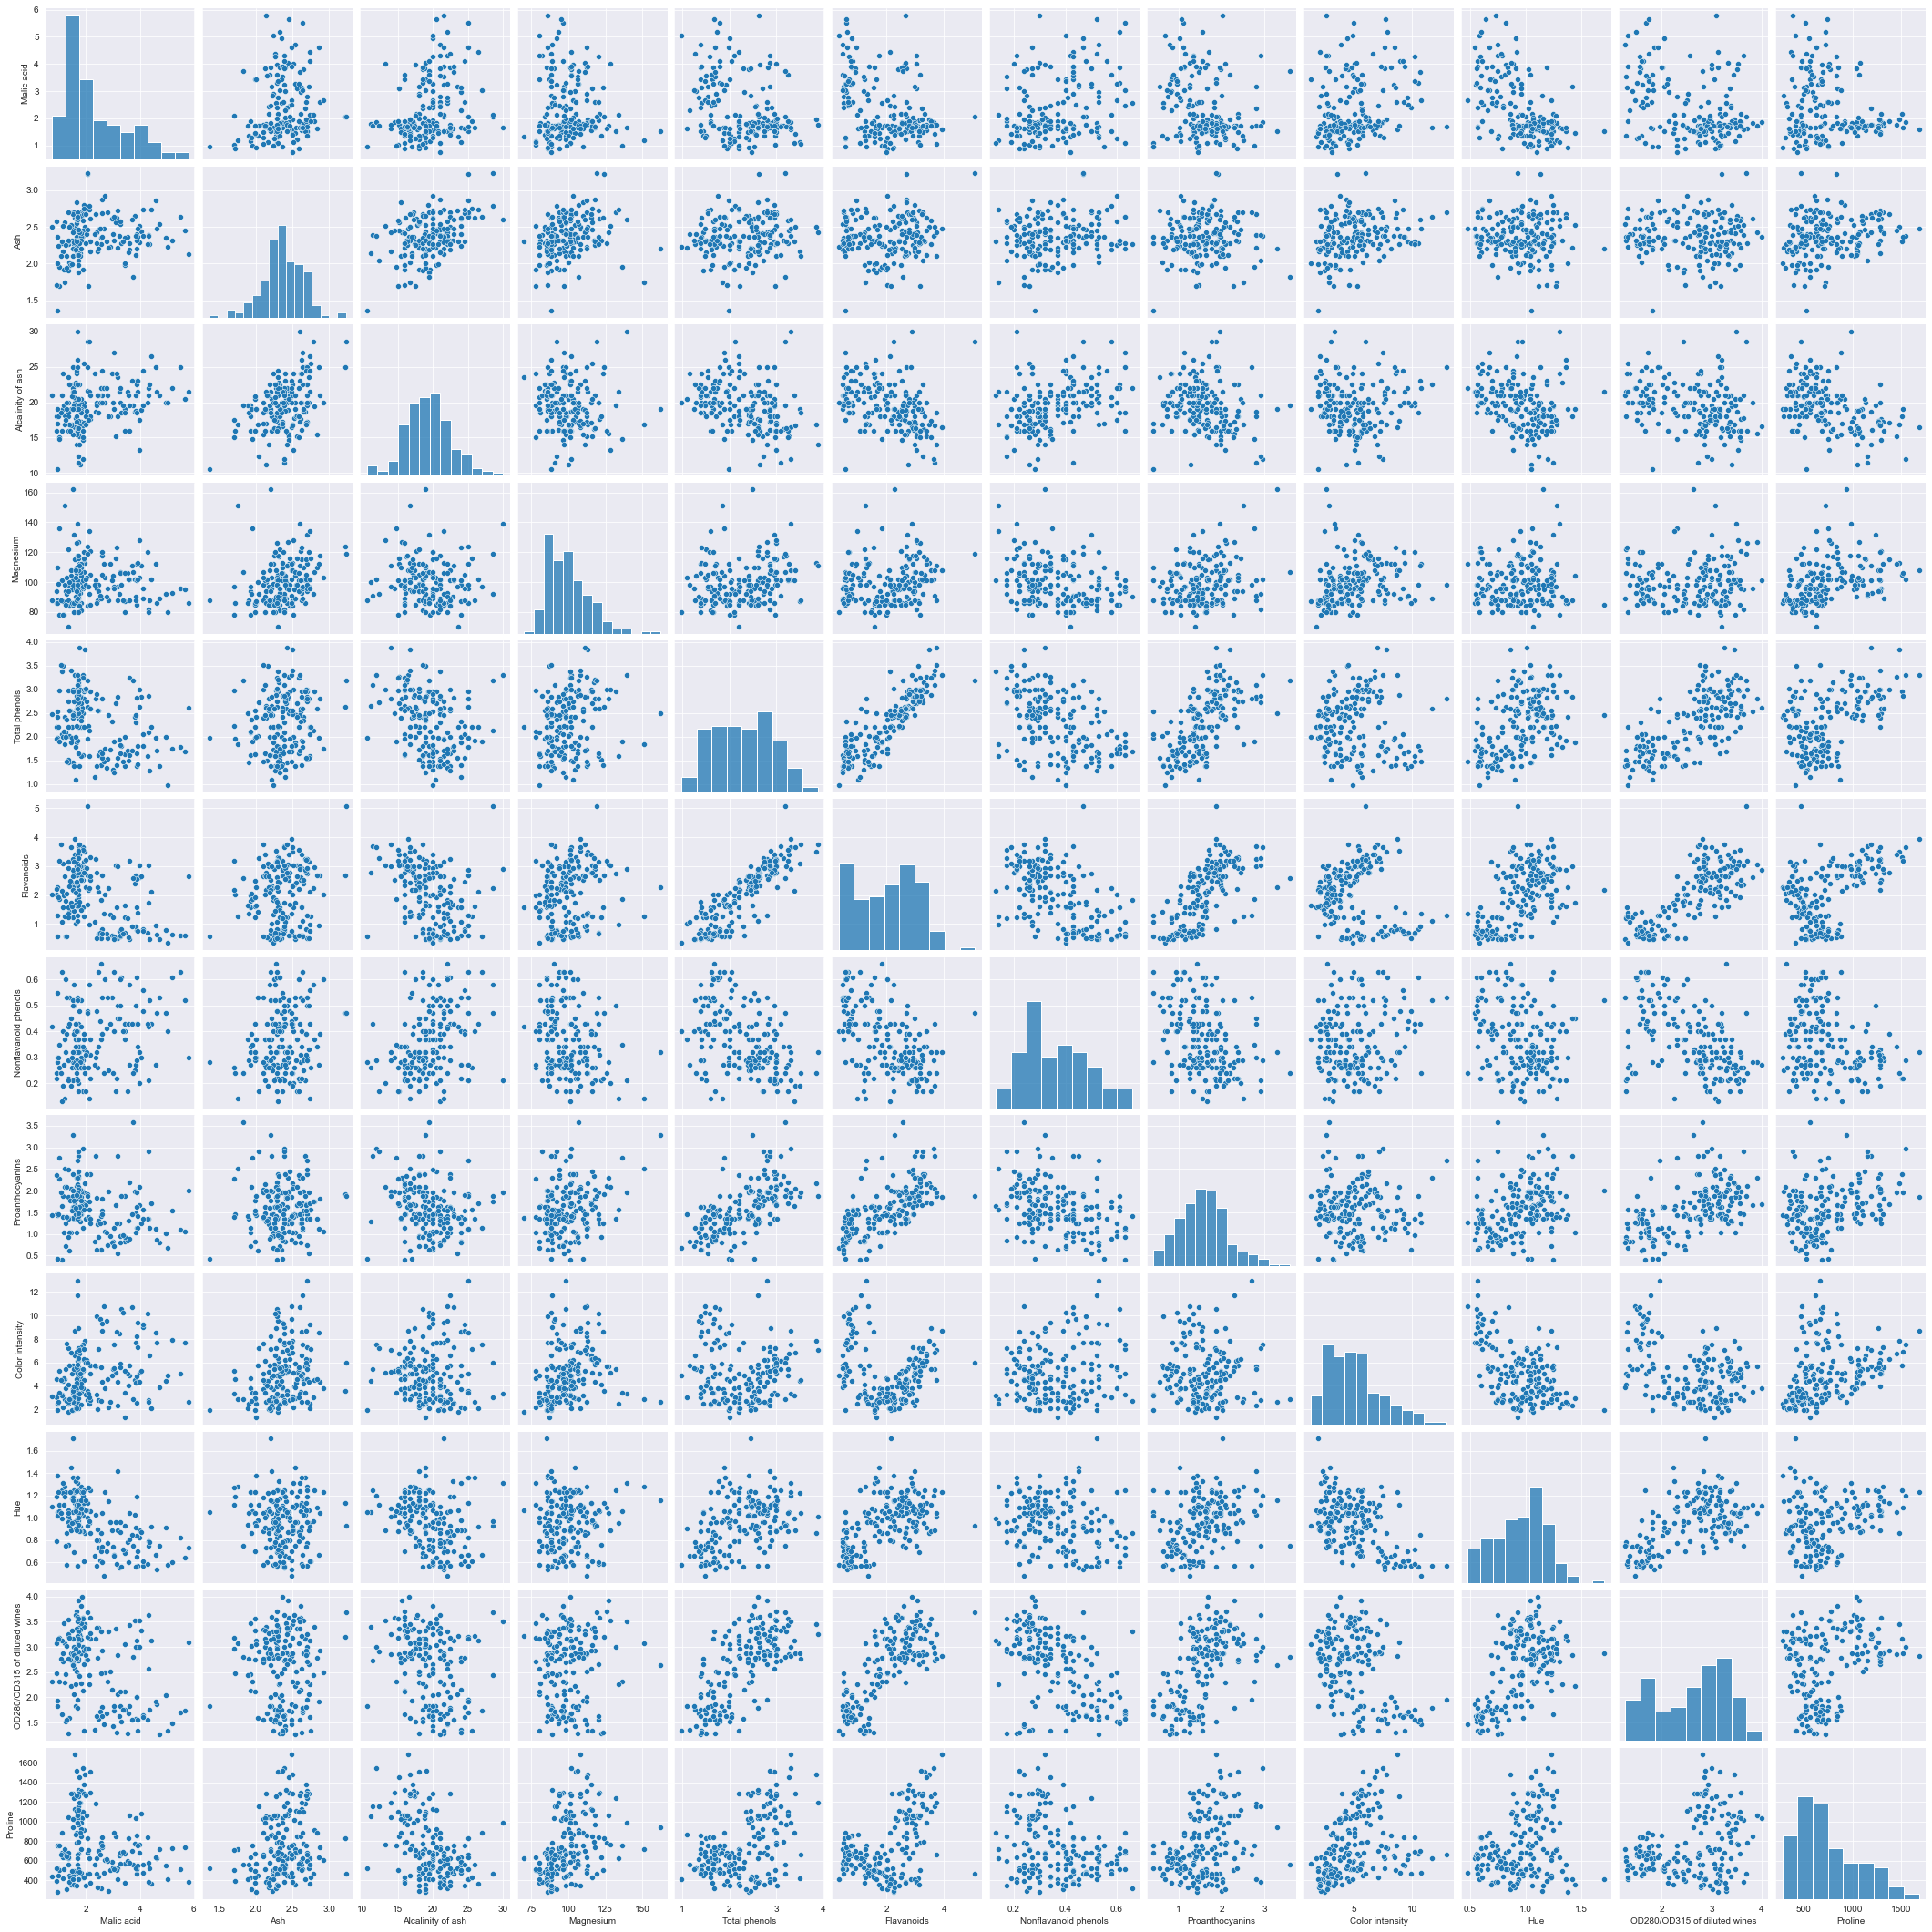

In [64]:
# 3.2. Utiliza el método pairplot() de Seaborn para mostrar la distribución de las variables, unas con respecto a las otras
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df.iloc[:,1:])
plt.show()

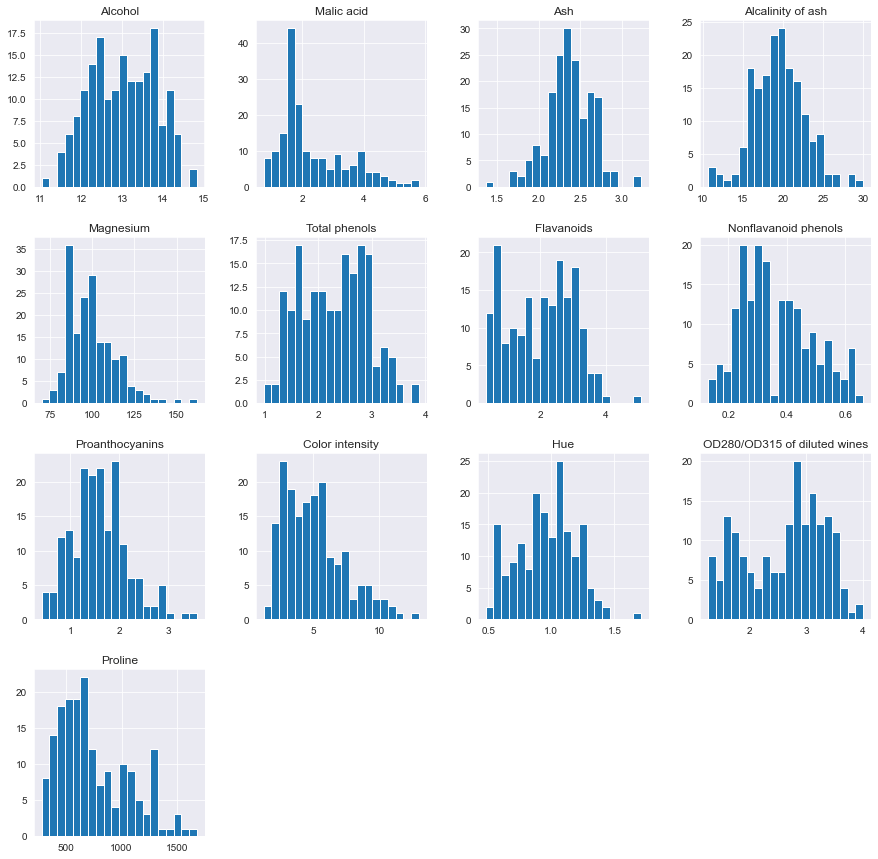

In [65]:
# 3.3. Muestra con un histograma las funciones de distribución de cada una de las variables
df.hist(bins=20,figsize=(15,15))
plt.show()

In [66]:
# 3.4. Analiza numéricamente la correlación entre las diferentes variables
df.corr(method='pearson')

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


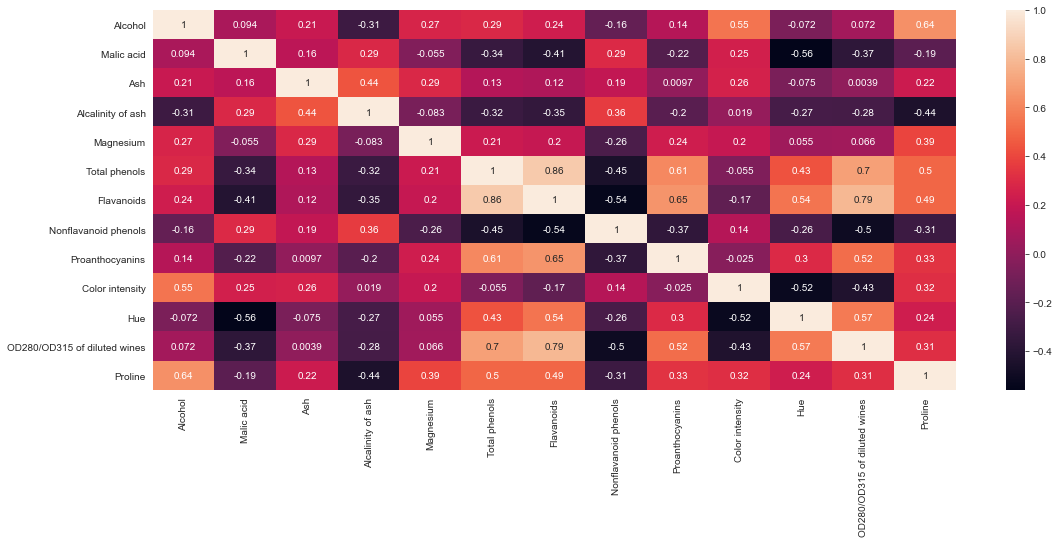

In [67]:
# 3.5. Analiza visualmente la correlación entre las diferentes variables
plt.figure(figsize=[18,7])
sns.heatmap(df.corr(),annot=True)
plt.show()

In [68]:
# 3.6. Separa las variables independientes de las etiquetas (variable objetivo o target).
X = df.drop('Class', axis=1) #axis=1 seria por columnas y borro la columna objetivo Class
y = df['Class']
X.head() #comprobación de que ya no existe la columna Class

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [69]:
# 3.7. Procede al escalado de los datos con un StandardScaler para poder realizar el análisis PCA.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [76]:
# 3.8. Comprueba que la media de la población transformada sea 0 y la desviación típica sea 1.
for i in range(X.shape[1]):
    print(i, round(np.mean(X[:,i])),round(np.std(X[:,i])))


0 0 1
1 0 1
2 0 1
3 0 1
4 0 1
5 0 1
6 0 1
7 0 1
8 0 1
9 0 1
10 0 1
11 0 1
12 0 1


In [79]:
# 3.9. Crea e inicializa una instancia de PCA.
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [80]:
# 3.10. Entrena el PCA con el dataset de wine.
df_X = pd.DataFrame(data=X,columns=df.columns[1:])
df_X_pos = pca.fit(df_X)

In [81]:
# 3.11. Muestra el porcentaje de varianza explicada/definida por cada uno de los componentes principales. //de las variables de la muestra
pca.explained_variance_ratio_
#Utilizando las 3 primeras variables (sobretodo los 2 primeros) obtendríamos un 66% de la información que nos aporta el dataset


array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

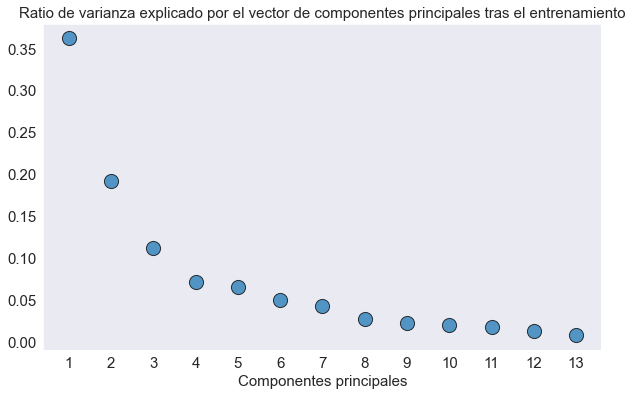

In [82]:
# 3.11.b. Muestra gráficamente el porcentaje de varianza explicada/definida por cada uno de los componentes

plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(pca.explained_variance_ratio_))], y=pca.explained_variance_ratio_,s=200,edgecolors='k',alpha=0.75)
plt.grid()
plt.title('Ratio de varianza explicado por el vector de componentes principales tras el entrenamiento', fontsize=15)
plt.xlabel('Componentes principales', fontsize=15)
plt.xticks([i+1 for i in range(len(pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [83]:
# 3.12. Usa el modelo PCA anterior para transformar la muestra, tal que consigamos una mejor separación de los diferentes componentes
df_X_trans = pca.transform(df_X)
pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
        0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
        0.01736836, 0.01298233, 0.00795215]),
 1.0)


# Webgrafia


[Curso de Akramz basado en Aurelien Geron](https://github.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow)
[Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
Curso de la Xunta de Galicia impartido por Alfonso Antolínez
[DataCamp](https://www.datacamp.com/)

# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.